In [1]:
import kagglehub
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import os
from torch.utils.data import DataLoader
from dataloader import ImageColorizerDataset

/home/gabri/miniconda3/envs/picture_colrization/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'DiagnosticOptions' from 'torch.onnx._internal.exporter' (/home/gabri/miniconda3/envs/picture_colrization/lib/python3.12/site-packages/torch/onnx/_internal/exporter/__init__.py)

In [16]:

# Download latest version
IMAGE_PATH = kagglehub.dataset_download("arnaud58/landscape-pictures")

print("Path to dataset files:", IMAGE_PATH)

Path to dataset files: /Users/gabrielmindlberger/.cache/kagglehub/datasets/arnaud58/landscape-pictures/versions/2


In [2]:

# Alle .jpg-Dateien im Ordner (ohne Sortierung)
files = [f for f in os.listdir(IMAGE_PATH) if f.lower().endswith(".jpg")]

total = len(files)
digits = len(str(total))  # Anzahl Ziffern

for idx, fname in enumerate(files, start=1):
    src = os.path.join(IMAGE_PATH, fname)
    new_name = f"{idx:0{digits}d}.jpg"  # z.B. 001.jpg, 002.jpg, …
    dst = os.path.join(IMAGE_PATH, new_name)
    os.rename(src, dst)

print(f"Renamed {total} files in '{IMAGE_PATH}'")

Renamed 4319 files in '/home/gabri/.cache/kagglehub/datasets/arnaud58/landscape-pictures/versions/2'


# Some Data Inspection after Preprocessing

l_batch shape: torch.Size([4, 1, 512, 512])
l_batch range: 0.0 – 1.0
ab_batch shape: torch.Size([4, 2, 512, 512])
ab_batch range: 0.3686274588108063 – 0.658823549747467


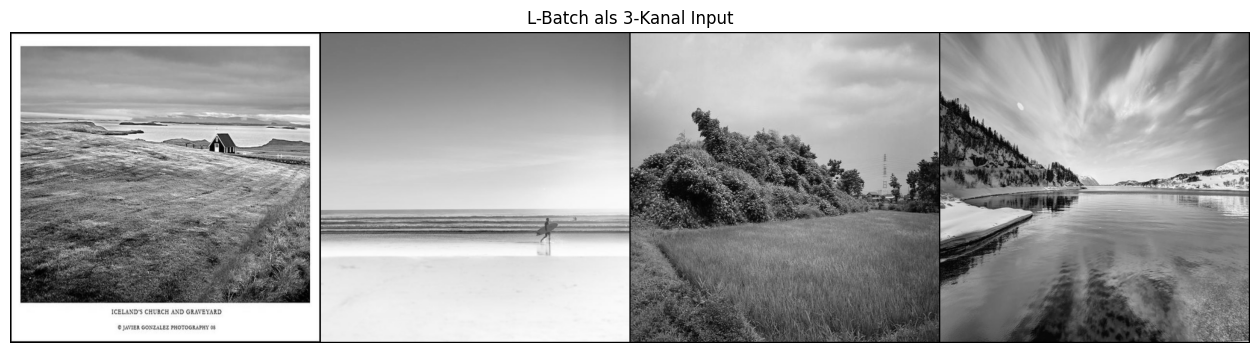

In [17]:
dataset = ImageColorizerDataset(IMAGE_PATH, 512, 512)
dataloader = DataLoader(dataset, batch_size=4)

# 1) Lade eine Batch
l_batch, ab_batch = next(iter(dataloader))  # l_batch: (B,1,H,W)

# 2) Prüfe Shapes und Wertebereiche
print("l_batch shape:",  l_batch.shape)
print("l_batch range:",  l_batch.min().item(), "–", l_batch.max().item())
print("ab_batch shape:", ab_batch.shape)
print("ab_batch range:", ab_batch.min().item(), "–", ab_batch.max().item())

# 3) 1 → 3 Kanäle kopieren und Grid bauen
l_rgb = l_batch.repeat(1, 3, 1, 1)           # (B,3,H,W)
grid = make_grid(l_rgb, nrow=4, padding=2)   # (3, H', W')

# 4) In H×W×3 permutieren und anzeigen
img = grid.permute(1, 2, 0).numpy()          # (H', W', 3)
plt.figure(figsize=(16,8))
plt.imshow(img)                              # kein cmap, ist jetzt echtes RGB
plt.title("L-Batch als 3-Kanal Input")
plt.axis('off')
plt.show()
